<a href="https://colab.research.google.com/github/Tirta2241720045/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Tirta Nurrochman Bintang Prawira
# NIM: 2241720045
# No: 27
# Kelas: TI-3A

# D. TUGAS PRAKTIKUM
1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.
- Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

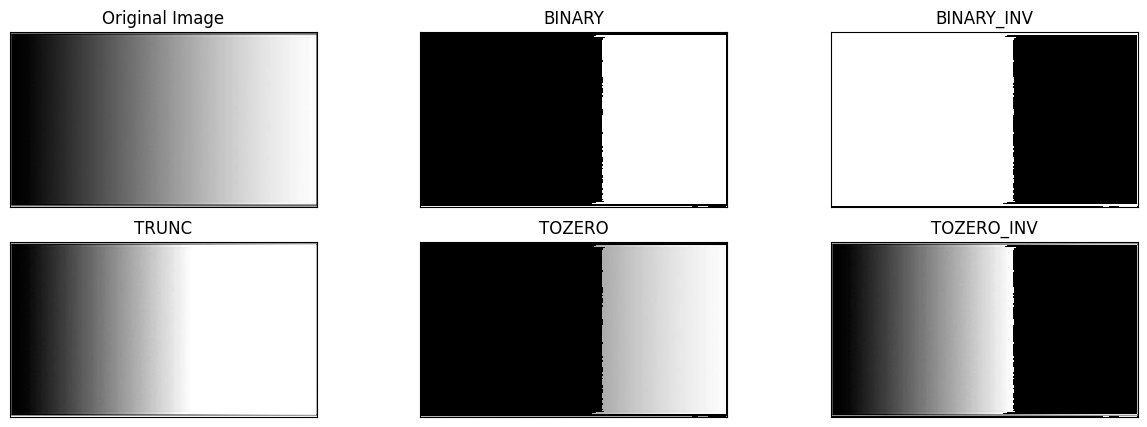

In [26]:
filename = ('/content/drive/MyDrive/dataset/Minggu8/gradientt.jpg')
img = cv.imread(filename)
thresh = 170
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# membuat citra hasil pengolahan dengan ukuran yang sama seperti citra asli
binary = np.zeros_like(img_gray)
binary_inv = np.zeros_like(img_gray)
trunc = np.zeros_like(img_gray)
tozero = np.zeros_like(img_gray)
tozero_inv = np.zeros_like(img_gray)

# melakukan operasi threshold secara manual
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        # BINARY
        if img_gray[i][j] > thresh:
            binary[i][j] = 255
        else:
            binary[i][j] = 0

        # BINARY_INV
        if img_gray[i][j] > thresh:
            binary_inv[i][j] = 0
        else:
            binary_inv[i][j] = 255

        # TRUNC
        if img_gray[i][j] > thresh:
            trunc[i][j] = thresh
        else:
            trunc[i][j] = img_gray[i][j]

        # TOZERO
        if img_gray[i][j] > thresh:
            tozero[i][j] = img_gray[i][j]
        else:
            tozero[i][j] = 0

        # TOZERO_INV
        if img_gray[i][j] > thresh:
            tozero_inv[i][j] = 0
        else:
            tozero_inv[i][j] = img_gray[i][j]

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary, binary_inv, trunc, tozero, tozero_inv]
plt.figure(figsize = (15,5))

for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-27-10cf7ef664ff>:18: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


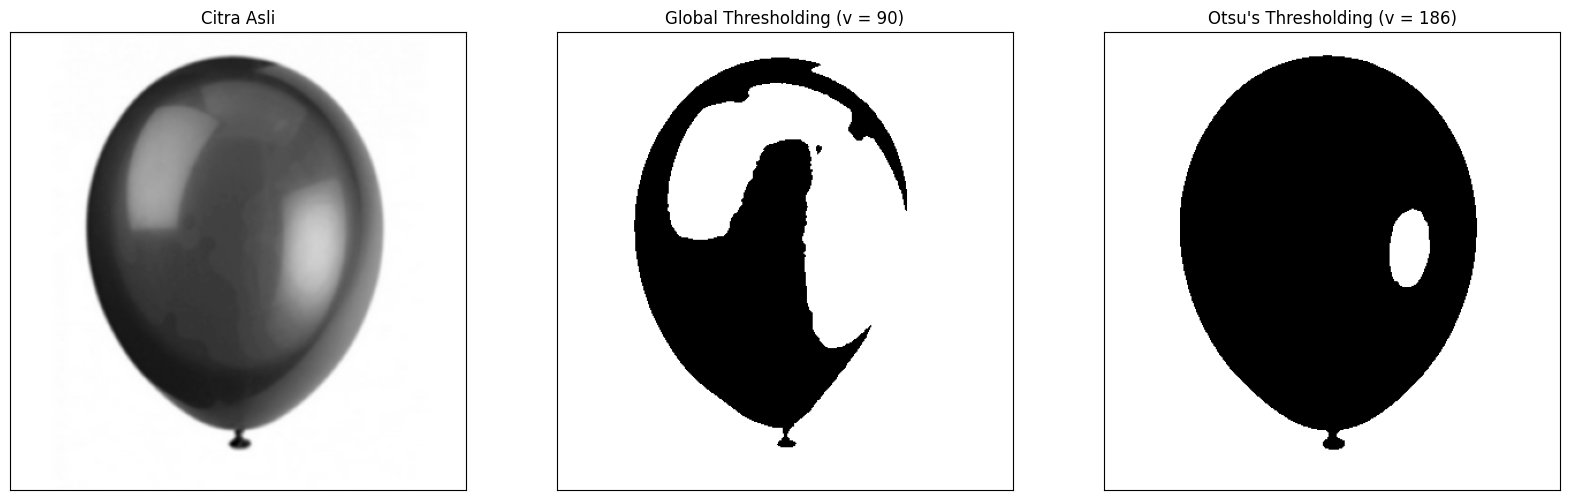

In [27]:
filename = ('/content/drive/MyDrive/dataset/Minggu8/ballon.png')
img = cv.imread(filename,0)
blur = cv. GaussianBlur (img, (5,5),0)

hist = cv.calcHist([blur],[0],None,[256], [0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
thresh = -1
for i in range(0,187):
  wb += hist[i]
  wf = (img.shape[0]*img.shape[1]) - wb
  sumb += (i*hist[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)
  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i
x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (blur, thresh, 255, cv. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]

plt. figure(figsize = (20,15))
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
- Petunjuk:
- anda dapat gunakan cv.calcHist untuk menampilkan histogram.
- Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
- Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

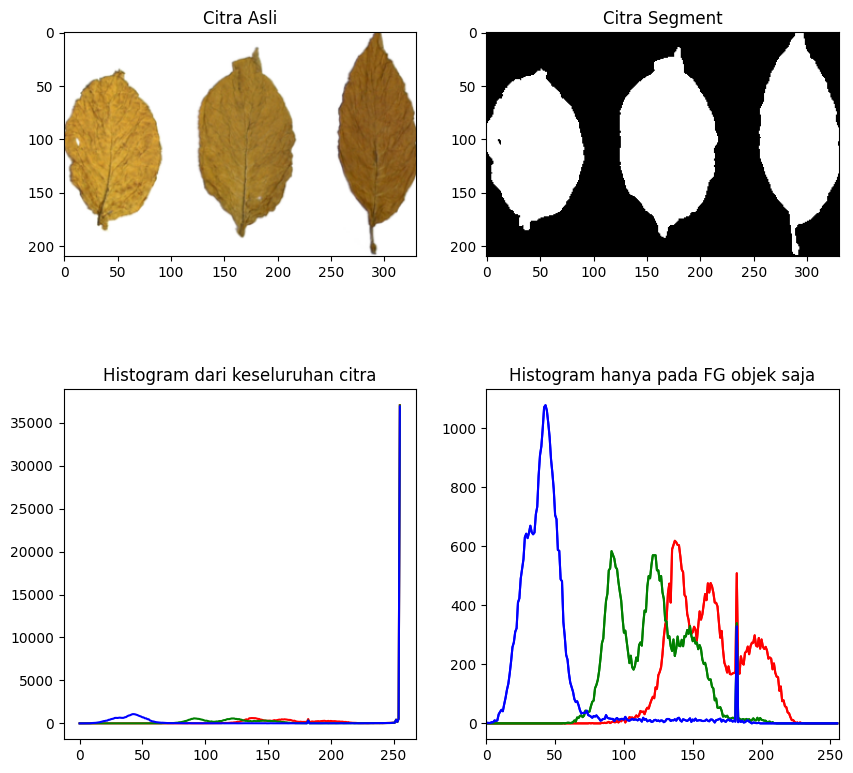

In [19]:
filename = ('/content/drive/MyDrive/dataset/Minggu8/tobacco.png')
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
thresh = 200

ret,mask = cv.threshold(img_gray,thresh,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7def04eea830>)

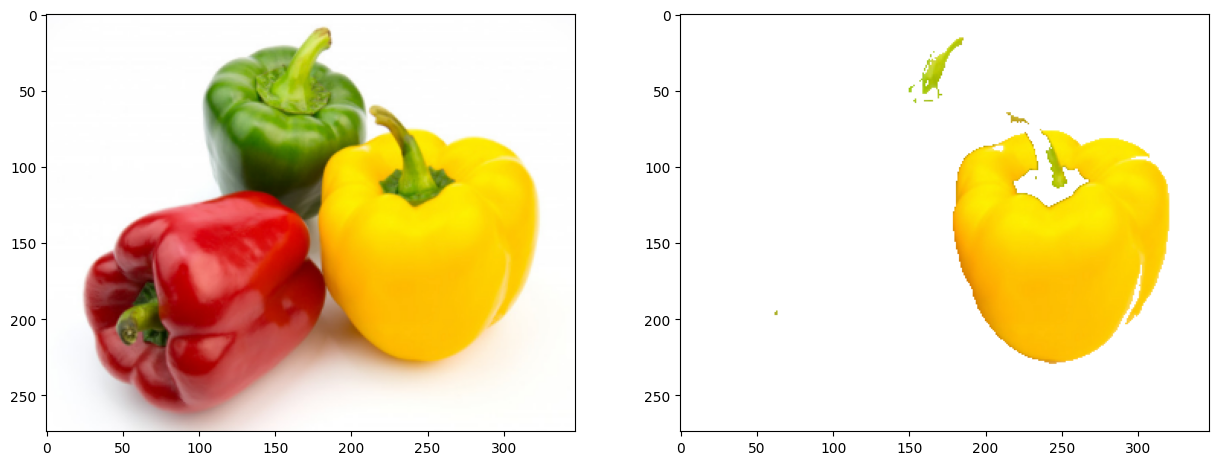

In [29]:
filename = ('/content/drive/MyDrive/dataset/Minggu8/peppers.jpg')
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

labels = labels.flatten()
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa
hal itu terjadi.
……………………………………………………………………………………………………………………………..
……………………………………………………………………………………………………………………………..
……………………………………………………………………………………………………………………………..
……………………………………………………………………………………………………………………………..
……………………………………………………………………………………………………………………………..


7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

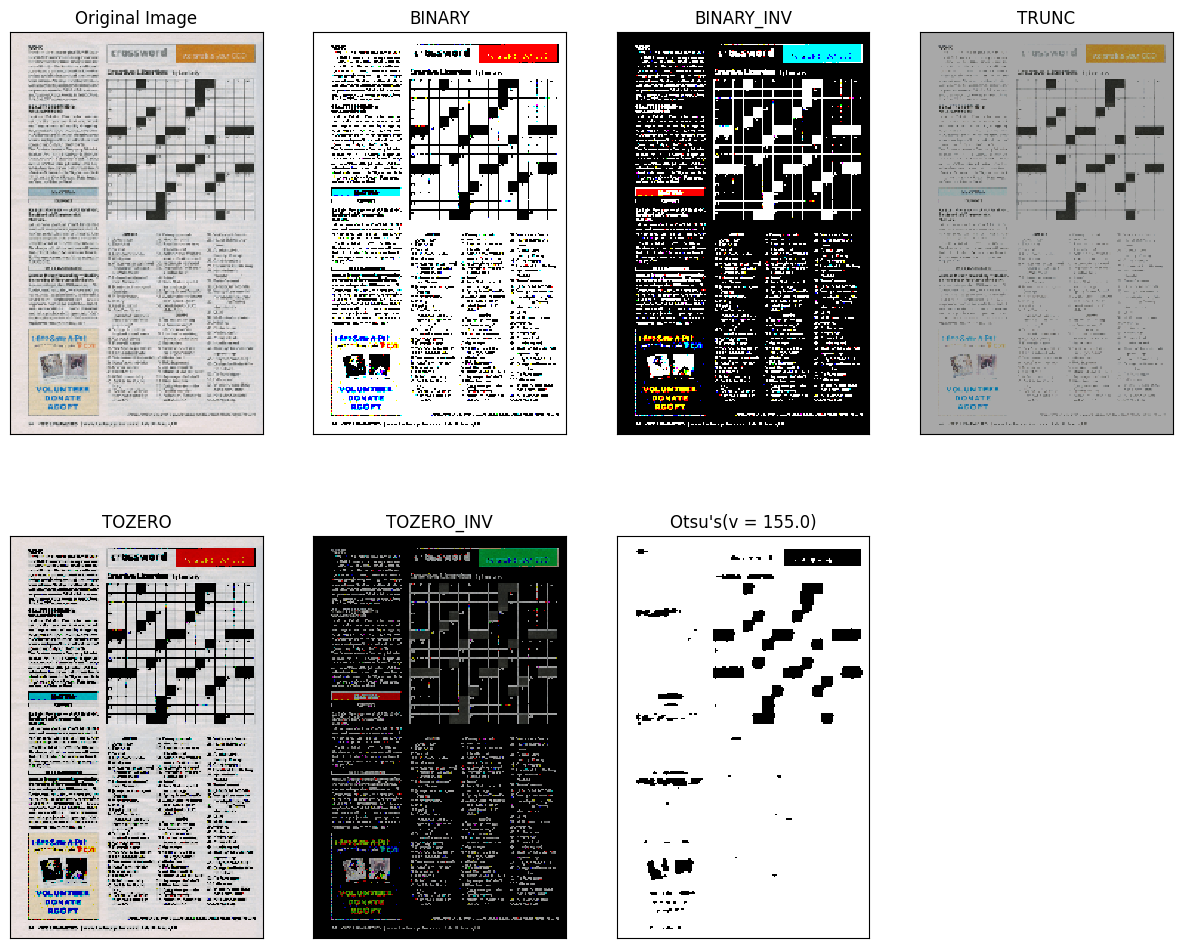

In [31]:
filename = ('/content/drive/MyDrive/dataset/Minggu8/crossword.png')
img = cv.imread(filename)
img_gray= cv.cvtColor(img, cv.COLOR_RGB2GRAY)
blur = cv.GaussianBlur(img_gray,(5,5),0)
thresh = 168

ret, thresh1 = cv.threshold(img, thresh,255,cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, thresh,255,cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, thresh,255,cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, thresh,255,cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, thresh,255,cv.THRESH_TOZERO_INV)
ret2, th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's(v = ") + str(ret2)+")"
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV',x]
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5,th2]

plt.figure(figsize = (15,12))

for i in range(len(images)):
  plt.subplot(2,4,i+1), plt.imshow(images[i], 'gray', interpolation = 'nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

--- SELAMAT BELAJAR ---